# Star Wars Survey

While waiting for Star Wars: The Force Awakens to come out, the team at FiveThirtyEight became interested in answering some questions about Star Wars fans. In particular, they wondered: does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?

The team needed to collect data addressing this question. To do this, they surveyed Star Wars fans using the online tool SurveyMonkey. They received 835 total responses, which you download from their GitHub repository.

For this project, we'll be cleaning and exploring the given data set, and creating some visualizations at the end.

Firstly, let's load the data set and observe some data and columns.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

star_wars = pd.read_csv("data/StarWars.csv", encoding="ISO-8859-1")

In [2]:
star_wars.head(3)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central


In [3]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

### Cleaning

First, we'll need to remove the invalid rows. For example, RespondentID is supposed to be a unique ID for each respondent, but it's blank in some rows. Let's remove any rows with invalid RespondentID.

In [4]:
id_bool_mask = star_wars['RespondentID'].notnull()
star_wars = star_wars[id_bool_mask]

Let's look at next two columns: 
- Have you seen any of the 6 films in the Star Wars franchise?
- Do you consider yourself to be a fan of the Star Wars film franchise?

Both represent Yes/No questions. They can also be NaN where a respondent chooses not to answer a question. 

Both columns are currently string types, because the main values they contain are Yes and No. We can make the data a bit easier to analyze down the road by converting each column to a Boolean having only the values True, False, and NaN.

In [5]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False)

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [6]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False)

Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [7]:
true_false_dict = {
    "Yes": True,
    "No": False
}

star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(true_false_dict)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(true_false_dict)

In [8]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False)

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [9]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False)

True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

The next six columns represent a single checkbox question. The respondent checked off a series of boxes in response to the question, Which of the following Star Wars films have you seen? Please select all that apply.

The columns for this question are:
- Which of the following Star Wars films have you seen? Please select all that apply. - Whether or not the respondent saw Star Wars: Episode I The Phantom Menace.
- Unnamed: 4 - Whether or not the respondent saw Star Wars: Episode II Attack of the Clones.
- Unnamed: 5 - Whether or not the respondent saw Star Wars: Episode III Revenge of the Sith.
- Unnamed: 6 - Whether or not the respondent saw Star Wars: Episode IV A New Hope.
- Unnamed: 7 - Whether or not the respondent saw Star Wars: Episode V The Empire Strikes Back.
- Unnamed: 8 - Whether or not the respondent saw Star Wars: Episode VI Return of the Jedi.

For each of these columns, if the value in a cell is the name of the movie, that means the respondent saw the movie. If the value is NaN, the respondent either didn't answer or didn't see the movie. We'll assume that they didn't see the movie.

We'll need to convert each of these columns to a Boolean, then rename the column something more intuitive. We can convert the values the same way we did earlier, except that we'll need to include the movie title and NaN in the mapping dictionary.

In [10]:
values = [
    'Star Wars: Episode I  The Phantom Menace',
    'Star Wars: Episode II  Attack of the Clones',
    'Star Wars: Episode III  Revenge of the Sith',
    'Star Wars: Episode IV  A New Hope',
    'Star Wars: Episode V The Empire Strikes Back',
    'Star Wars: Episode VI Return of the Jedi'
]
columns = [
    'seen_1',
    'seen_2',
    'seen_3',
    'seen_4',
    'seen_5',
    'seen_6'
]
count = 0

for col in star_wars.columns[3:9]:
    values_map_dict = {
        values[count]: True,
        np.NaN: False
    }
    star_wars[col] = star_wars[col].map(values_map_dict)
    star_wars = star_wars.rename(columns={col: columns[count]})
    
    count += 1

The next six columns ask the respondent to rank the Star Wars movies in order of least favorite to most favorite. 1 means the film was the most favorite, and 6 means it was the least favorite. Each of the following columns can contain the value 1, 2, 3, 4, 5, 6, or NaN:
- Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film. - How much the respondent liked Star Wars: Episode I The Phantom Menace
- Unnamed: 10 - How much the respondent liked Star Wars: Episode II Attack of the Clones
- Unnamed: 11 - How much the respondent liked Star Wars: Episode III Revenge of the Sith
- Unnamed: 12 - How much the respondent liked Star Wars: Episode IV A New Hope
- Unnamed: 13 - How much the respondent liked Star Wars: Episode V The Empire Strikes Back
- Unnamed: 14 - How much the respondent liked Star Wars: Episode VI Return of the Jedi

Fortunately, these columns don't require a lot of cleanup. We'll need to convert each column to a numeric type, though, then rename the columns so that we can tell what they represent more easily.

In [11]:
columns = [
    'ranking_1',
    'ranking_2',
    'ranking_3',
    'ranking_4',
    'ranking_5',
    'ranking_6'
]

count = 0

for col in star_wars.columns[9:15]:
    star_wars[col] = star_wars[col].astype(float)
    star_wars = star_wars.rename(columns={col: columns[count]})
    count += 1

### Vizualisations

Now that we've cleaned the data set, we can start creating some data visualizations.

Firstly, let's plot a chart of average rankings by episode.

([<matplotlib.axis.YTick at 0x252598ce128>,
 <a list of 6 Text yticklabel objects>)

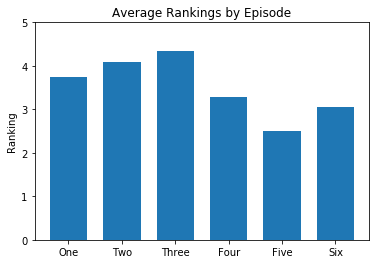

In [12]:
ranking_means = []
for col in star_wars.columns[9:15]:
    ranking_means.append(star_wars[col].mean())

%matplotlib inline
N = 6
ind = np.arange(N)    # the x locations for the groups
width = 0.7       # the width of the bars: can also be len(x) sequence
p1 = plt.bar(ind, ranking_means, width)
plt.ylabel('Ranking')
plt.title('Average Rankings by Episode')
plt.xticks(ind, ('One', 'Two', 'Three', 'Four', 'Five', 'Six'))
plt.yticks(np.arange(0, 6, 1))


As we can see, the highest ranked episode is episode 3, and the lowest ranked one is 5.

Let's split the rankings by gender now and see the result.

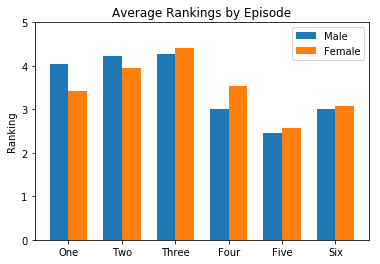

In [13]:
female_means = []
male_means = []

male_responses = star_wars[star_wars['Gender'] == 'Male']
female_responses = star_wars[star_wars['Gender'] == 'Female']

for col in male_responses.columns[9:15]:
    male_means.append(male_responses[col].mean())
    
for col in female_responses.columns[9:15]:
    female_means.append(female_responses[col].mean())

%matplotlib inline
N = 6
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence
fig, ax = plt.subplots()
p1 = ax.bar(ind - width/2, male_means, width, label='Male')
p2 = ax.bar(ind + width/2, female_means, width, label='Female')
ax.set_ylabel('Ranking')
ax.set_title('Average Rankings by Episode')
plt.xticks(ind, ('One', 'Two', 'Three', 'Four', 'Five', 'Six'))
ax.set_yticks(np.arange(0, 6, 1))
ax.legend()

We can see that both men and women ranked the third episode as highest and episode five as lowest. Moreover, we can notice that women put a higher rank for episodes three, four, five and size than man while men put a higher ranks for episodes one and two. 

Next, let's find out the most seen episode.

([<matplotlib.axis.XTick at 0x2525a080b38>,
 <a list of 6 Text xticklabel objects>)

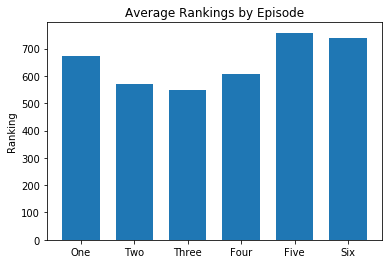

In [14]:
seen_sums = []
for col in star_wars.columns[3:9]:
    seen_sums.append(star_wars[col].sum())

%matplotlib inline
N = 6
ind = np.arange(N)    # the x locations for the groups
width = 0.7       # the width of the bars: can also be len(x) sequence
p1 = plt.bar(ind, seen_sums, width)
plt.ylabel('Ranking')
plt.title('Average Rankings by Episode')
plt.xticks(ind, ('One', 'Two', 'Three', 'Four', 'Five', 'Six'))


It seems that the most popular episodes were episodes five and six while the least popular were two and three.

Now, let's split data by gender and plot results for males and females seperetaly.

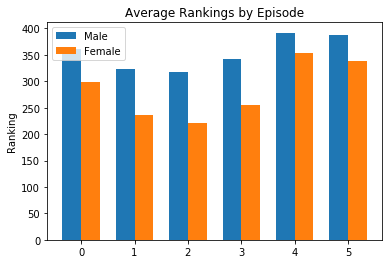

In [15]:
female_seen_sums = []
male_seen_sums = []

for col in male_responses.columns[3:9]:
    male_seen_sums.append(male_responses[col].sum())
    
for col in female_responses.columns[3:9]:
    female_seen_sums.append(female_responses[col].sum())

%matplotlib inline
N = 6
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence
fig, ax = plt.subplots()
p1 = ax.bar(ind - width/2, male_seen_sums, width, label='Male')
p2 = ax.bar(ind + width/2, female_seen_sums, width, label='Female')
ax.set_ylabel('Ranking')
ax.set_title('Average Rankings by Episode')
ax.set_xticks(ind, ('One', 'Two', 'Three', 'Four', 'Five', 'Six'))
ax.legend()

We can notice that Star Wars episodes are more popular among men. The highest difference was for second, third and fourth episodes. The most popular episode among women was fift episode.

Fnally, let's split responders by education level.

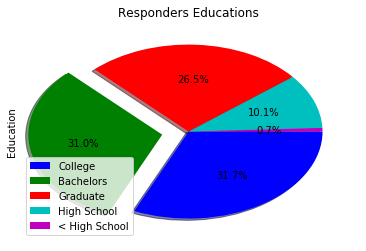

In [16]:
labels = ['College', 'Bachelors', 'Graduate', 'High School', '< High School']
colors = ['b', 'g', 'r', 'c', 'm', 'y']
ed_counts = star_wars['Education'].value_counts()
ed_counts.plot.pie(shadow=True,
                   labels = None,
                   colors = colors,
                   counterclock=False,
                   explode=(0, 0.2, 0, 0, 0),
                   autopct='%1.1f%%')
plt.legend(labels,loc=3)
plt.title('Responders Educations')

plt.show()

Most of repsponders had a High School or a higher degree. Roughly 1/3 were bachelors and 1/3 had a college degree. 